# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.tree import plot_tree

In [3]:
base_credito = pd.read_csv("./analise_credito.csv")

In [4]:
base_credito.head(10)

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,1,1,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,0,1,0,1,0,0,0,0
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,0,1,0,1,0,0,0,0
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,0,1,0,0,0,1,0,0,0,0
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,0,1,0,0,0,1,0,0,0,0
5,5,0,29.230137,3.021918,1,0,0,0,2.0,False,...,0,1,0,0,0,1,0,0,0,0
6,6,0,27.482192,4.024658,1,0,1,0,2.0,False,...,1,1,0,0,0,1,0,0,0,0
7,7,0,27.482192,4.024658,1,0,1,0,2.0,False,...,1,1,0,0,0,1,0,0,0,0
8,8,1,30.049315,4.438356,1,0,0,0,2.0,False,...,1,0,0,1,0,1,0,0,0,0
9,9,1,30.049315,4.438356,1,0,0,0,2.0,False,...,1,0,0,1,0,1,0,0,0,0


In [5]:
base_credito.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
base_credito.shape

(16650, 29)

In [7]:
X = base_credito.drop('mau', axis=1)
y = base_credito.mau
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
X.shape

(16650, 28)

In [9]:
y.shape

(16650,)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

[Text(0.5597080402740413, 0.98, 'tempo_emprego <= 2.848\ngini = 0.048\nsamples = 11655\nvalue = [11367, 288]\nclass = mau_False'),
 Text(0.33332882107519035, 0.94, 'tempo_emprego <= 1.284\ngini = 0.072\nsamples = 4211\nvalue = [4053, 158]\nclass = mau_False'),
 Text(0.2205240299119967, 0.9, 'estado_civil_Married <= 0.5\ngini = 0.056\nsamples = 2961\nvalue = [2875, 86]\nclass = mau_False'),
 Text(0.17466143814691532, 0.86, 'sexo_M <= 0.5\ngini = 0.084\nsamples = 1048\nvalue = [1002, 46]\nclass = mau_False'),
 Text(0.13556153390178285, 0.82, 'educacao_Incomplete higher <= 0.5\ngini = 0.066\nsamples = 883\nvalue = [853, 30]\nclass = mau_False'),
 Text(0.10624230541242989, 0.78, 'idade <= 66.607\ngini = 0.059\nsamples = 855\nvalue = [829, 26]\nclass = mau_False'),
 Text(0.07824540604623592, 0.74, 'educacao_Lower secondary <= 0.5\ngini = 0.053\nsamples = 810\nvalue = [788, 22]\nclass = mau_False'),
 Text(0.06383657835939993, 0.7, 'estado_civil_Widow <= 0.5\ngini = 0.051\nsamples = 802\nvalu

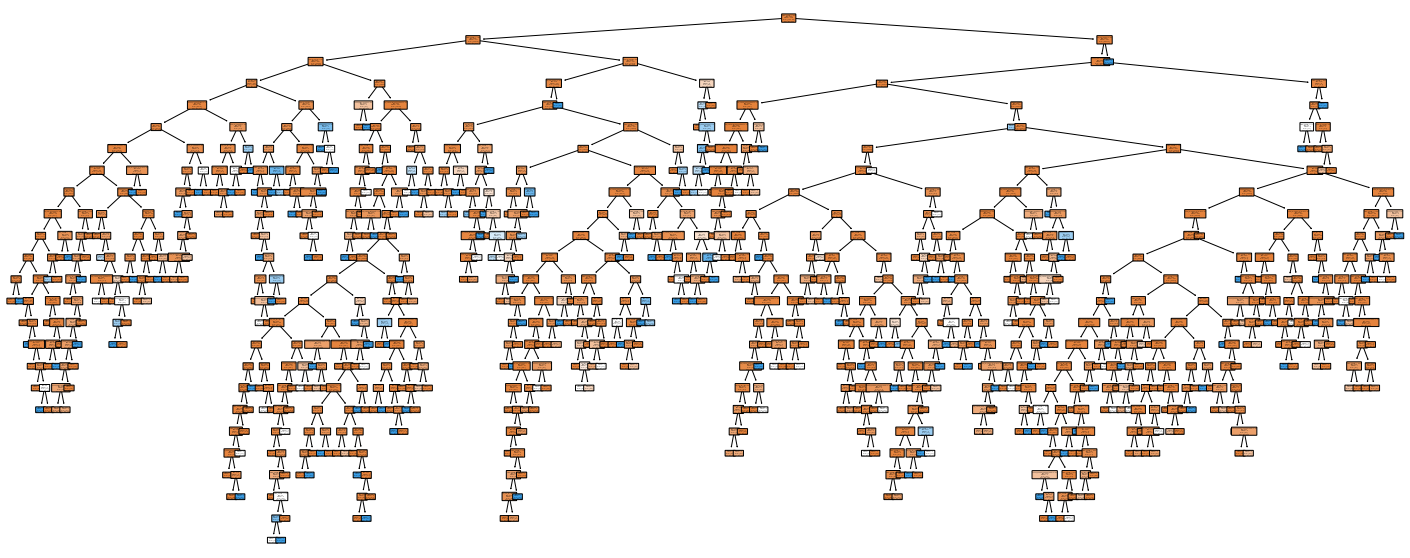

In [10]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
plt.figure(figsize=(25, 10))
plot_tree(
    tree_clf,
    filled=True,
    rounded=True,
    class_names=['mau_False', 'mau_True'],
    feature_names=X_train.columns
)

c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


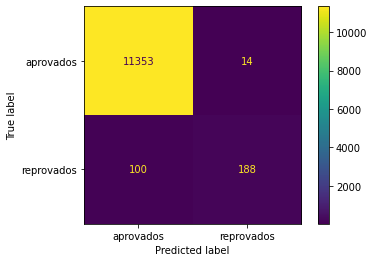

In [11]:
# Matriz de confusão
plot_confusion_matrix(tree_clf, X_train, y_train, display_labels=['aprovados', 'reprovados'])

In [12]:
# Calculando a acurácia
previsao = tree_clf.predict(X_train)
accuracy_score(y_train, previsao)

0.9902187902187902

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


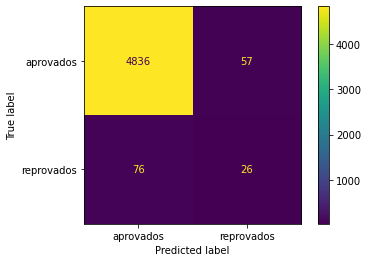

In [13]:
base_teste = tree_clf.predict(X_test)
plot_confusion_matrix(tree_clf, X_test, y_test, display_labels=['aprovados', 'reprovados'])

In [14]:
accuracy_score(y_test, base_teste)

0.9733733733733734

In [15]:
# Exercicio 4
clf = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123) 
clf = clf.fit(X_train, y_train)
previsao = clf.predict(X_test)
accuracy_score(y_test, previsao)

0.978978978978979

c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


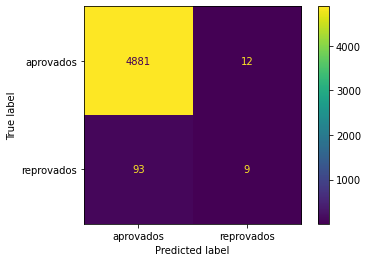

In [16]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['aprovados', 'reprovados'])

In [17]:
print(f'Observando a matriz de confusão acima, {35/4995:2f}% dos dados foram classificados como maus')

Observando a matriz de confusão acima, 0.007007% dos dados foram classificados como maus


[Text(0.5517887443438914, 0.9545454545454546, 'tempo_emprego <= 2.848\ngini = 0.048\nsamples = 11655\nvalue = [11367, 288]\nclass = aprovados'),
 Text(0.310272907239819, 0.8636363636363636, 'tempo_emprego <= 1.284\ngini = 0.072\nsamples = 4211\nvalue = [4053, 158]\nclass = aprovados'),
 Text(0.18467194570135748, 0.7727272727272727, 'estado_civil_Married <= 0.5\ngini = 0.056\nsamples = 2961\nvalue = [2875, 86]\nclass = aprovados'),
 Text(0.13065610859728508, 0.6818181818181818, 'sexo_M <= 0.5\ngini = 0.084\nsamples = 1048\nvalue = [1002, 46]\nclass = aprovados'),
 Text(0.09276018099547512, 0.5909090909090909, 'educacao_Incomplete higher <= 0.5\ngini = 0.066\nsamples = 883\nvalue = [853, 30]\nclass = aprovados'),
 Text(0.06787330316742081, 0.5, 'idade <= 66.607\ngini = 0.059\nsamples = 855\nvalue = [829, 26]\nclass = aprovados'),
 Text(0.04072398190045249, 0.4090909090909091, 'educacao_Lower secondary <= 0.5\ngini = 0.053\nsamples = 810\nvalue = [788, 22]\nclass = aprovados'),
 Text(0.03

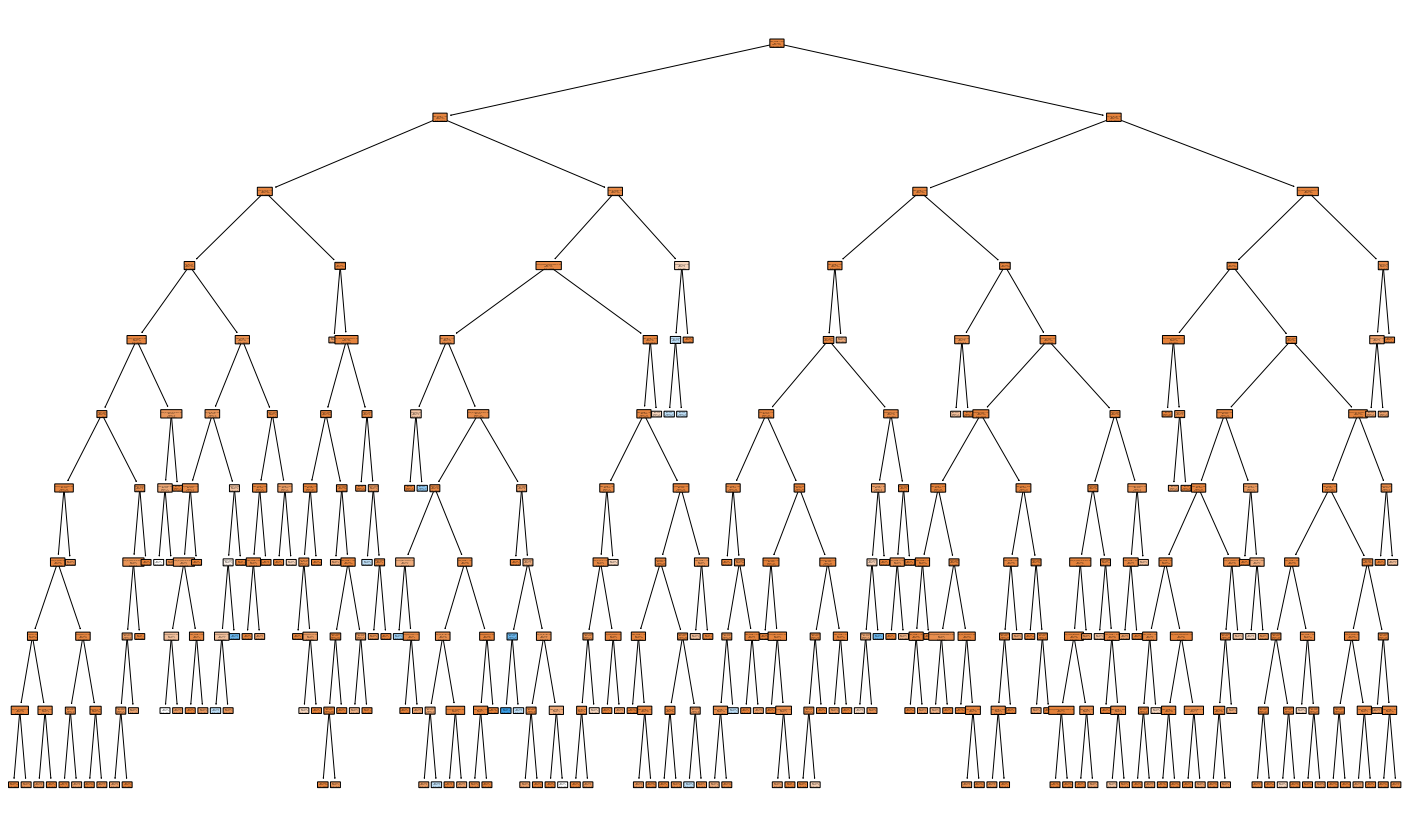

In [18]:
plt.figure(figsize=[25, 15])
plot_tree(clf, filled=True, rounded=True, class_names=['aprovados', 'reprovados'], feature_names=X_train.columns)

Se todos os contratos fossem classificados como bons, a acurácia ficaria:

In [27]:
acuracia_bons = 4811/157 * 100
print(f'Se todos os contratos fossem classificados como bons, a acurárica ficaria: {acuracia_bons:.2f}%')

Se todos os contratos fossem classificados como bons, a acurárica ficaria: 3064.33%
